<div style="display: flex; justify-content: space-between;">
<a style="flex: 1; text-align: left;" href="./3_2_1_MLR_bus_weather.ipynb">← Previous: 3.2.1 MLR with Weather</a>
<a style="flex: 1; text-align: right;" href="./4_Conclusions.ipynb">Next: 4. Conclusions →</a>
</div>

### 3.2.2 MLR with Traffic
---


# **Multiple Linear Regression: Bus Data & Traffic**
---

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler #sci-kit learn

In [ ]:
df_test2 = pd.read_csv('../Data/master_data_traffic.csv')

In [ ]:
df_test2 = df_test2.drop(columns=['date','end_time'])

# Extract only the time part from the datetime string
df_test2['start_time'] = df_test2['start_time'].str.split(' ').str[1]

# Convert the start_time column to minutes after midnight
df_test2['start_time'] = pd.to_datetime(df_test2['start_time'], format='%H:%M:%S')
df_test2['start_time'] = df_test2['start_time'].dt.hour * 60 + df_test2['start_time'].dt.minute

df_test2.head()


,line,delay_start,start_time,temp_start,rain_amt,snow_amt,delay_end,total_traffic,T_NBLT,T_NBT,T_NBRT,T_SBLT,T_SBT,T_SBRT,T_EBLT,T_EBT,T_EBRT,T_WBLT,T_WBT,T_WBRT
0,467,0,405,7.1,0.0,0.0,6,3674.0,0.0,1236.0,23.0,4.0,1270.0,155.0,165.0,157.0,68.0,2.0,478.0,116.0
1,467,1,437,6.9,0.0,0.0,5,3116.0,0.0,1031.0,56.0,0.0,927.0,103.0,130.0,238.0,45.0,0.0,473.0,113.0
2,467,1,468,6.9,0.0,0.0,6,3984.0,0.0,1330.0,44.0,0.0,1167.0,170.0,191.0,312.0,89.0,3.0,567.0,111.0
3,467,-1,496,6.5,0.0,0.0,6,2655.0,0.0,853.0,35.0,0.0,884.0,113.0,116.0,171.0,86.0,1.0,321.0,75.0
4,467,0,527,6.5,0.0,0.0,6,2273.0,0.0,762.0,32.0,0.0,774.0,81.0,96.0,164.0,47.0,1.0,253.0,63.0


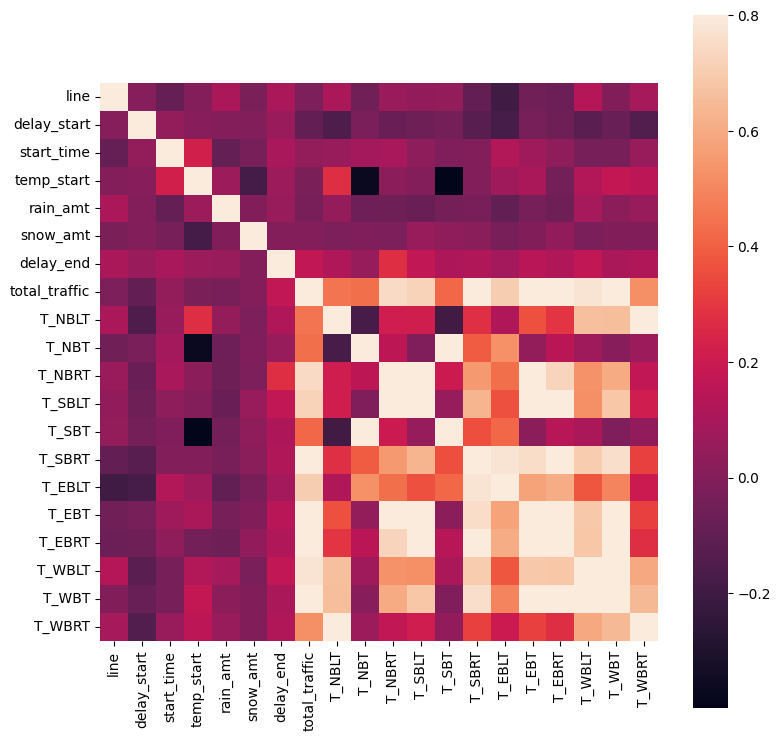

In [ ]:
Corr_mat = df_test2.corr()
fig = plt.figure(figsize = (9,9))

sb.heatmap(Corr_mat, vmax = .8, square = True)
plt.show()

In [ ]:
#set predictors_t as all columns of df_test2 except delay_end
predictors_t = df_test2.columns.tolist()
predictors_t.remove('delay_end')
outcome_t = 'delay_end'

In [ ]:
#convert all columns to float
for col in predictors_t:
    df_test2[col] = df_test2[col].astype(float)

for i in range(len(predictors_t)):
    for j in range(len(predictors_t)):
        if i < j:
            corr, _ = pearsonr(df_test2[predictors_t[i]], df_test2[predictors_t[j]])
            print('The correlation between', predictors_t[i], 'and', predictors_t[j], 'is', str(corr))

The correlation between line and delay_start is 0.0042326257648843445
The correlation between line and start_time is -0.0813147427825599
The correlation between line and temp_start is 0.0011059130260820324
The correlation between line and rain_amt is 0.10817207314619826
The correlation between line and snow_amt is -0.02099615729686905
The correlation between line and total_traffic is -0.01674587760425039
The correlation between line and T_NBLT is 0.10464780116958133
The correlation between line and T_NBT is -0.05714589354046702
The correlation between line and T_NBRT is 0.0616162236986575
The correlation between line and T_SBLT is 0.040488953254499985
The correlation between line and T_SBT is 0.04429601561023413
The correlation between line and T_SBRT is -0.09393275088786159
The correlation between line and T_EBLT is -0.19628837791013434
The correlation between line and T_EBT is -0.05214984500973917
The correlation between line and T_EBRT is -0.07167294918584301
The correlation between

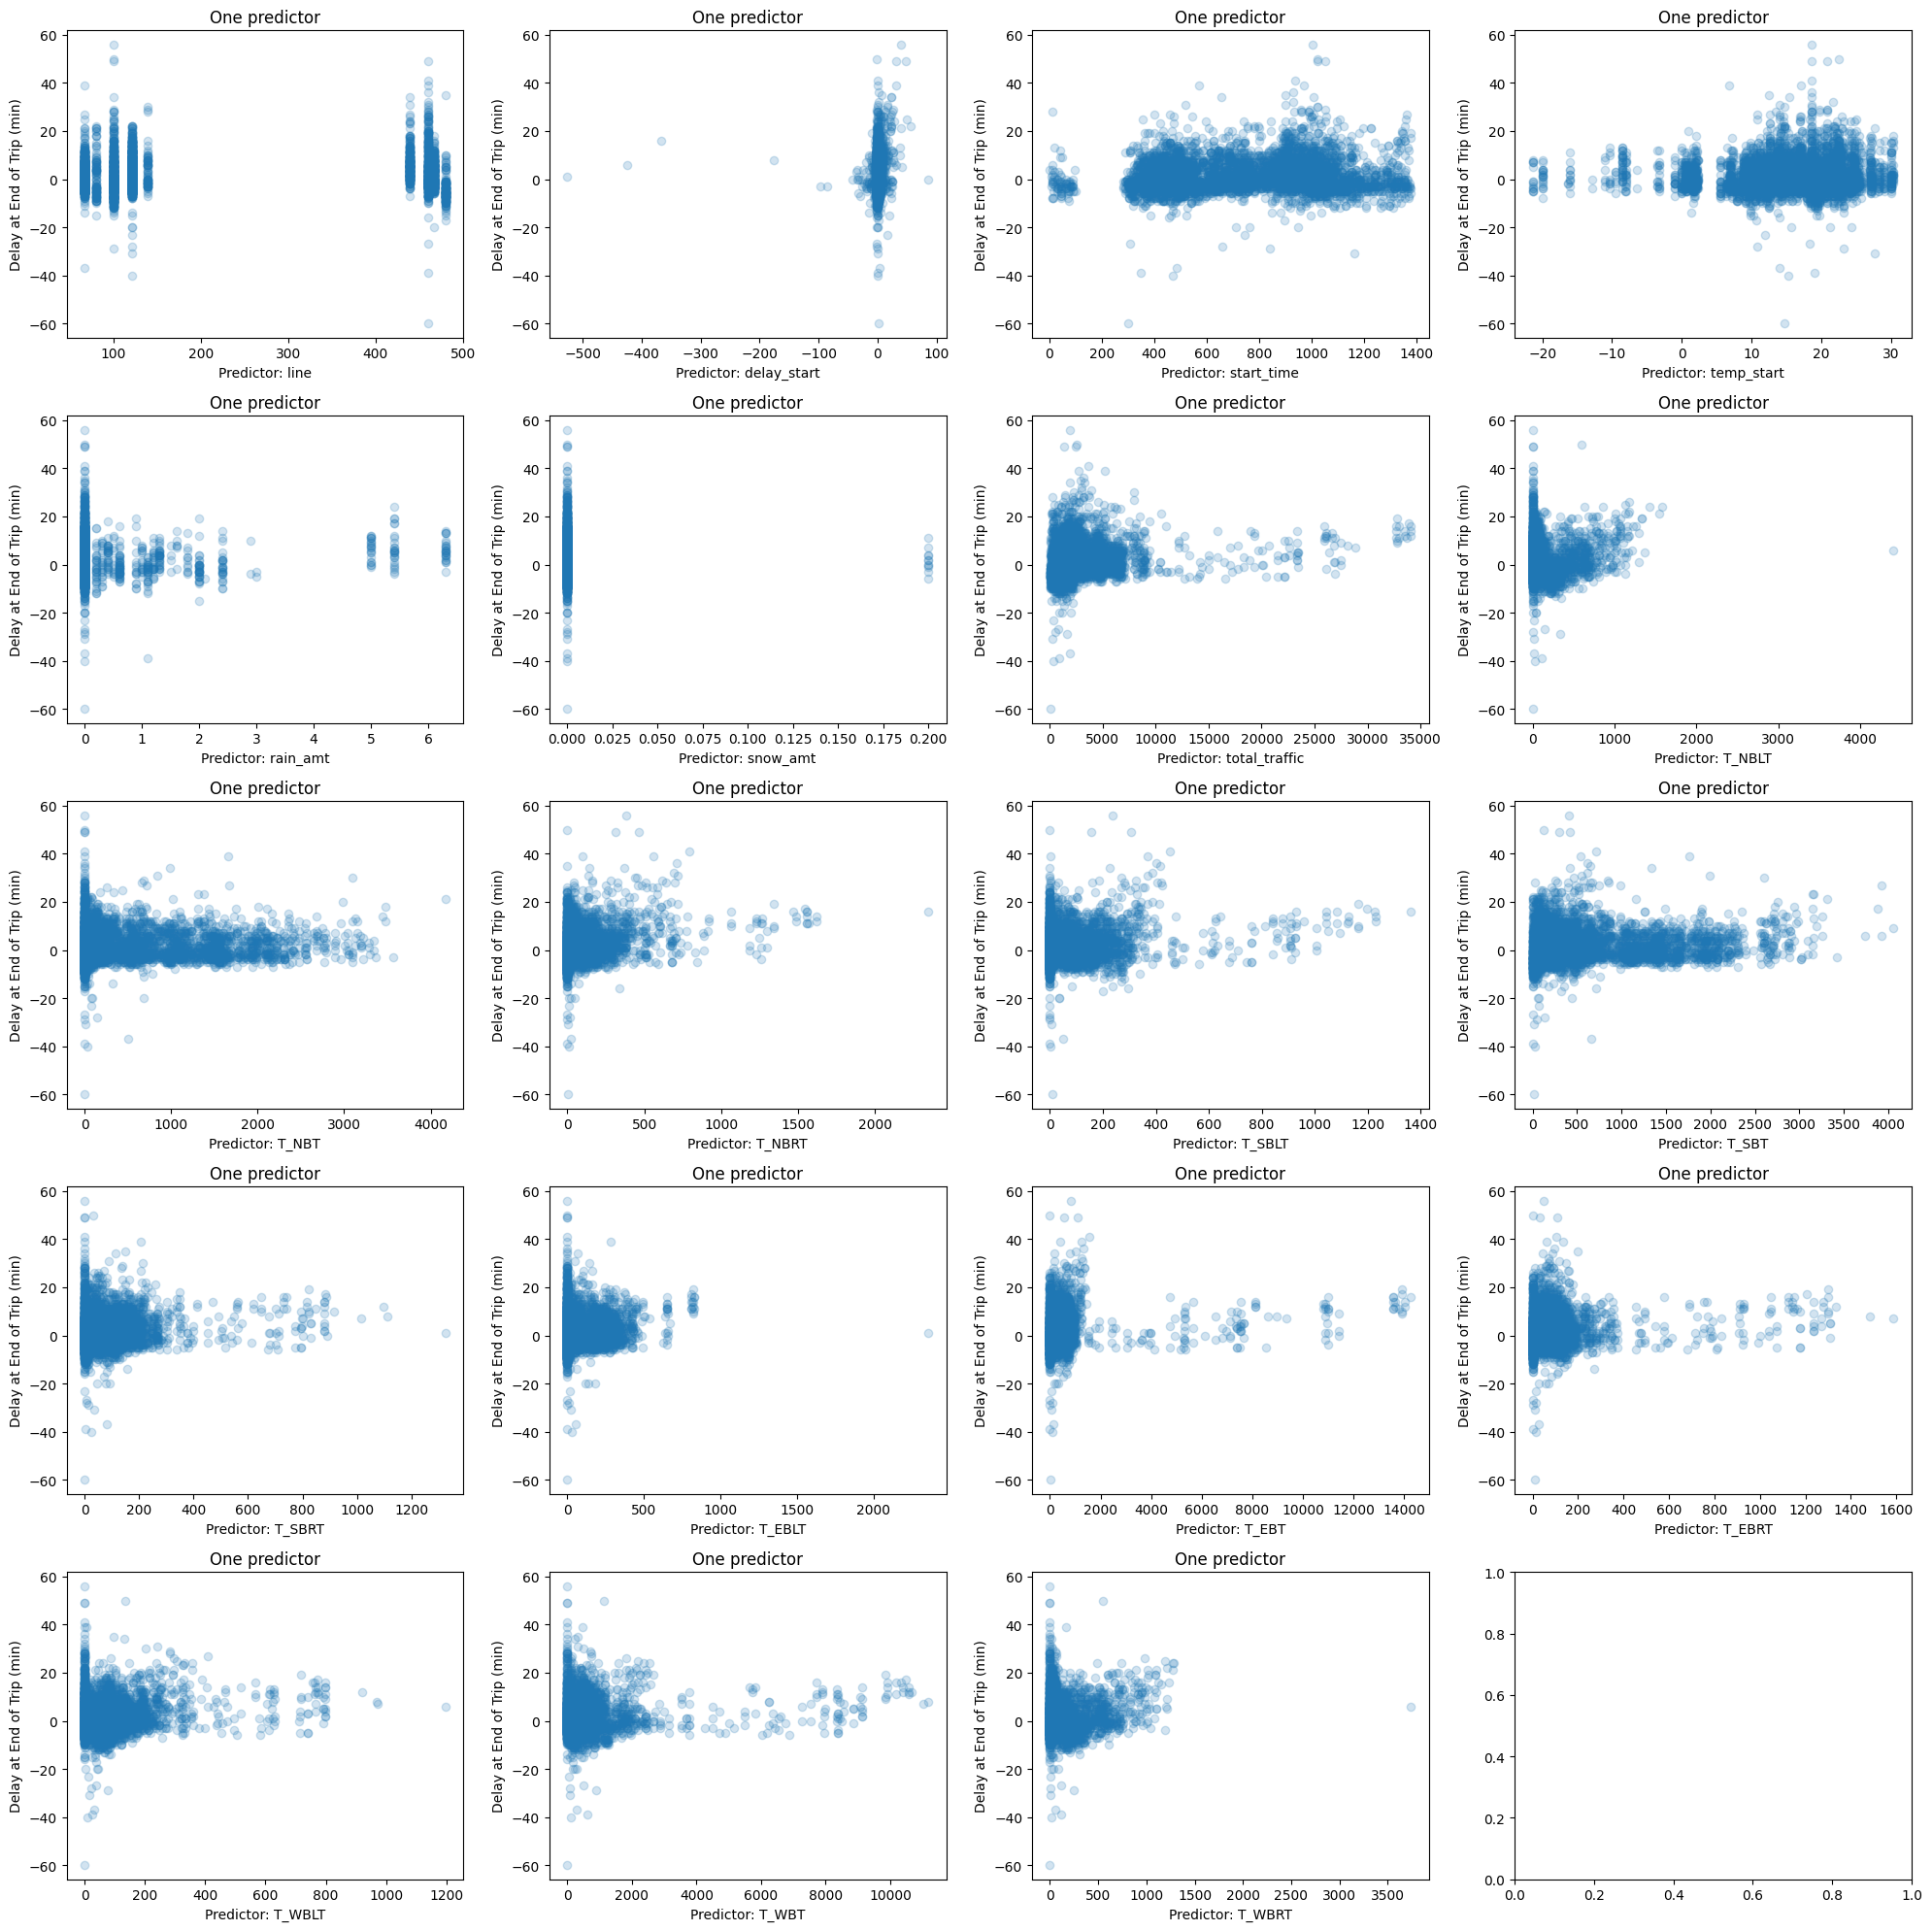

In [ ]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))

if len(predictors_t) <= len(ax.flat):
    for i, axi in enumerate(ax.flat):
        if i < len(predictors_t):
            axi.scatter(df_test2[predictors_t[i]], df_test2[outcome_t], color='tab:blue', alpha=0.2)
            axi.set_ylabel('Delay at End of Trip (min)')
            axi.set_xlabel(f'Predictor: {predictors_t[i]}')
            axi.set_title("One predictor")
else:
    print("Number of predictors exceeds the number of subplots")

plt.tight_layout()
plt.show()

In [ ]:
#lets make a model with all lines

predictors_t2 = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'snow_amt', 'total_traffic']
outcome_t2 = 'delay_end'

model = sm.OLS(df_test2[outcome_t2], df_test2[predictors_t2].assign(const=1))
results = model.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              delay_end   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     44.87
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           8.69e-54
Time:                        13:10:15   Log-Likelihood:                -17009.
No. Observations:                5134   AIC:                         3.403e+04
Df Residuals:                    5127   BIC:                         3.408e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
delay_start       0.0417      0.008      5.312      0.000       0.026       0.057
start_time        0.0019      0.000      5.827      0.000       0.001       0.003
temp_start        0.0433      0.012      3.549      0.000       0.019       0.067
rain_amt          0.6417      0.129      4.960      0.000       0.388       0.895
snow_amt         11.3640     10.207      1.113      0.266      -8.647      31.375
total_traffic     0.0004   2.75e-05     12.874      0.000       0.000       0.000
const            -1.6028      0.294     -5.450      0.000      -2.179      -1.026
==============================================================================
Omnibus:                     1201.053   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8628.430
Skew:                           0.927   Prob(JB):                         0.00
Kurtosis:                       9.075   Cond. No.                     4.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#snow_amt is not significant (p>0.05), lets remove it

predictors_t3 = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'total_traffic']
outcome_t3 = 'delay_end'

model = sm.OLS(df_test2[outcome_t3], df_test2[predictors_t3].assign(const=1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              delay_end   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     53.60
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           2.07e-54
Time:                        13:10:15   Log-Likelihood:                -17010.
No. Observations:                5134   AIC:                         3.403e+04
Df Residuals:                    5128   BIC:                         3.407e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
delay_start       0.0416      0.008      5.310      0.000       0.026       0.057
start_time        0.0019      0.000      5.831      0.000       0.001       0.003
temp_start        0.0409      0.012      3.406      0.001       0.017       0.064
rain_amt          0.6421      0.129      4.963      0.000       0.389       0.896
total_traffic     0.0004   2.75e-05     12.868      0.000       0.000       0.000
const            -1.5621      0.292     -5.353      0.000      -2.134      -0.990
==============================================================================
Omnibus:                     1200.710   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8621.654
Skew:                           0.927   Prob(JB):                         0.00
Kurtosis:                       9.072   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#make a dictionary of dataframes for each line
df_line_t = {value: df_test2.loc[df_test2['line'] == value] for value in df_test2['line'].unique()}
#each dataframe can be accessed by df_line_t[line], e.g. df_line_t[1] is the dataframe for line 1



In [ ]:
#print keys of df_line_t
for key in df_line_t.keys():
    print(key)

467.0
67.0
480.0
121.0
80.0
100.0
460.0
139.0
439.0


In [ ]:
#make a model for each line and store the r-squared values in a dictionary

# Create a dictionary to store the r-squared values
rsquared_t = {key: {} for key in df_line_t.keys()}

predictors_lines = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'total_traffic']
outcome_lines = 'delay_end'

for key in df_line_t.keys():
    # Create a model for each dataframe in df_line_t
    model = sm.OLS(df_line_t[key][outcome_lines], df_line_t[key][predictors_lines].assign(const=1))
    results = model.fit()
    # Store the r-squared value in rsquared
    rsquared_t[key] = results.rsquared

# Print the r-squared values rounded to 3 decimal places
for key in rsquared_t.keys():
    print(key, round(rsquared_t[key], 3))

467.0 0.052
67.0 0.033
480.0 0.212
121.0 0.084
80.0 0.411
100.0 0.339
460.0 0.325
139.0 0.118
439.0 0.278


In [ ]:
#delay_end plotted against total_traffic is exponential, so we will take the exp of total_traffic

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

for key in df_line_t.keys():
    # Fit the scaler to the total_traffic column and transform it
    df_line_t[key].loc[:, 'total_traffic_exp'] = scaler.fit_transform(df_line_t[key][['total_traffic']])
    
    # Apply the exponential function to the scaled total_traffic column
    df_line_t[key].loc[:, 'total_traffic_exp'] = np.exp(df_line_t[key]['total_traffic_exp'])

#make a model for each line and store the r-squared values in a dictionary

# Create a dictionary to store the r-squared values
rsquared_t = {key: {} for key in df_line_t.keys()}

predictors_lines_exp = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'total_traffic_exp']
outcome_lines_exp = 'delay_end'

for key in df_line_t.keys():
    # Create a model for each dataframe in df_line_t
    model = sm.OLS(df_line_t[key][outcome_lines_exp], df_line_t[key][predictors_lines_exp].assign(const=1))
    results = model.fit()
    # Store the r-squared value in rsquared
    rsquared_t[key] = results.rsquared

# Print the r-squared values rounded to 3 decimal places
for key in rsquared_t.keys():
    print(key, round(rsquared_t[key], 3))


467.0 0.056
67.0 0.035
480.0 0.24
121.0 0.084
80.0 0.434
100.0 0.339
460.0 0.302
139.0 0.134
439.0 0.284


C:\Users\fer_g\AppData\Local\Temp\ipykernel_21476\2242310265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line_t[key].loc[:, 'total_traffic_exp'] = scaler.fit_transform(df_line_t[key][['total_traffic']])
C:\Users\fer_g\AppData\Local\Temp\ipykernel_21476\2242310265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line_t[key].loc[:, 'total_traffic_exp'] = scaler.fit_transform(df_line_t[key][['total_traffic']])
C:\Users\fer_g\AppData\Local\Temp\ipykernel_21476\2242310265.py:8: SettingWithCopyWa

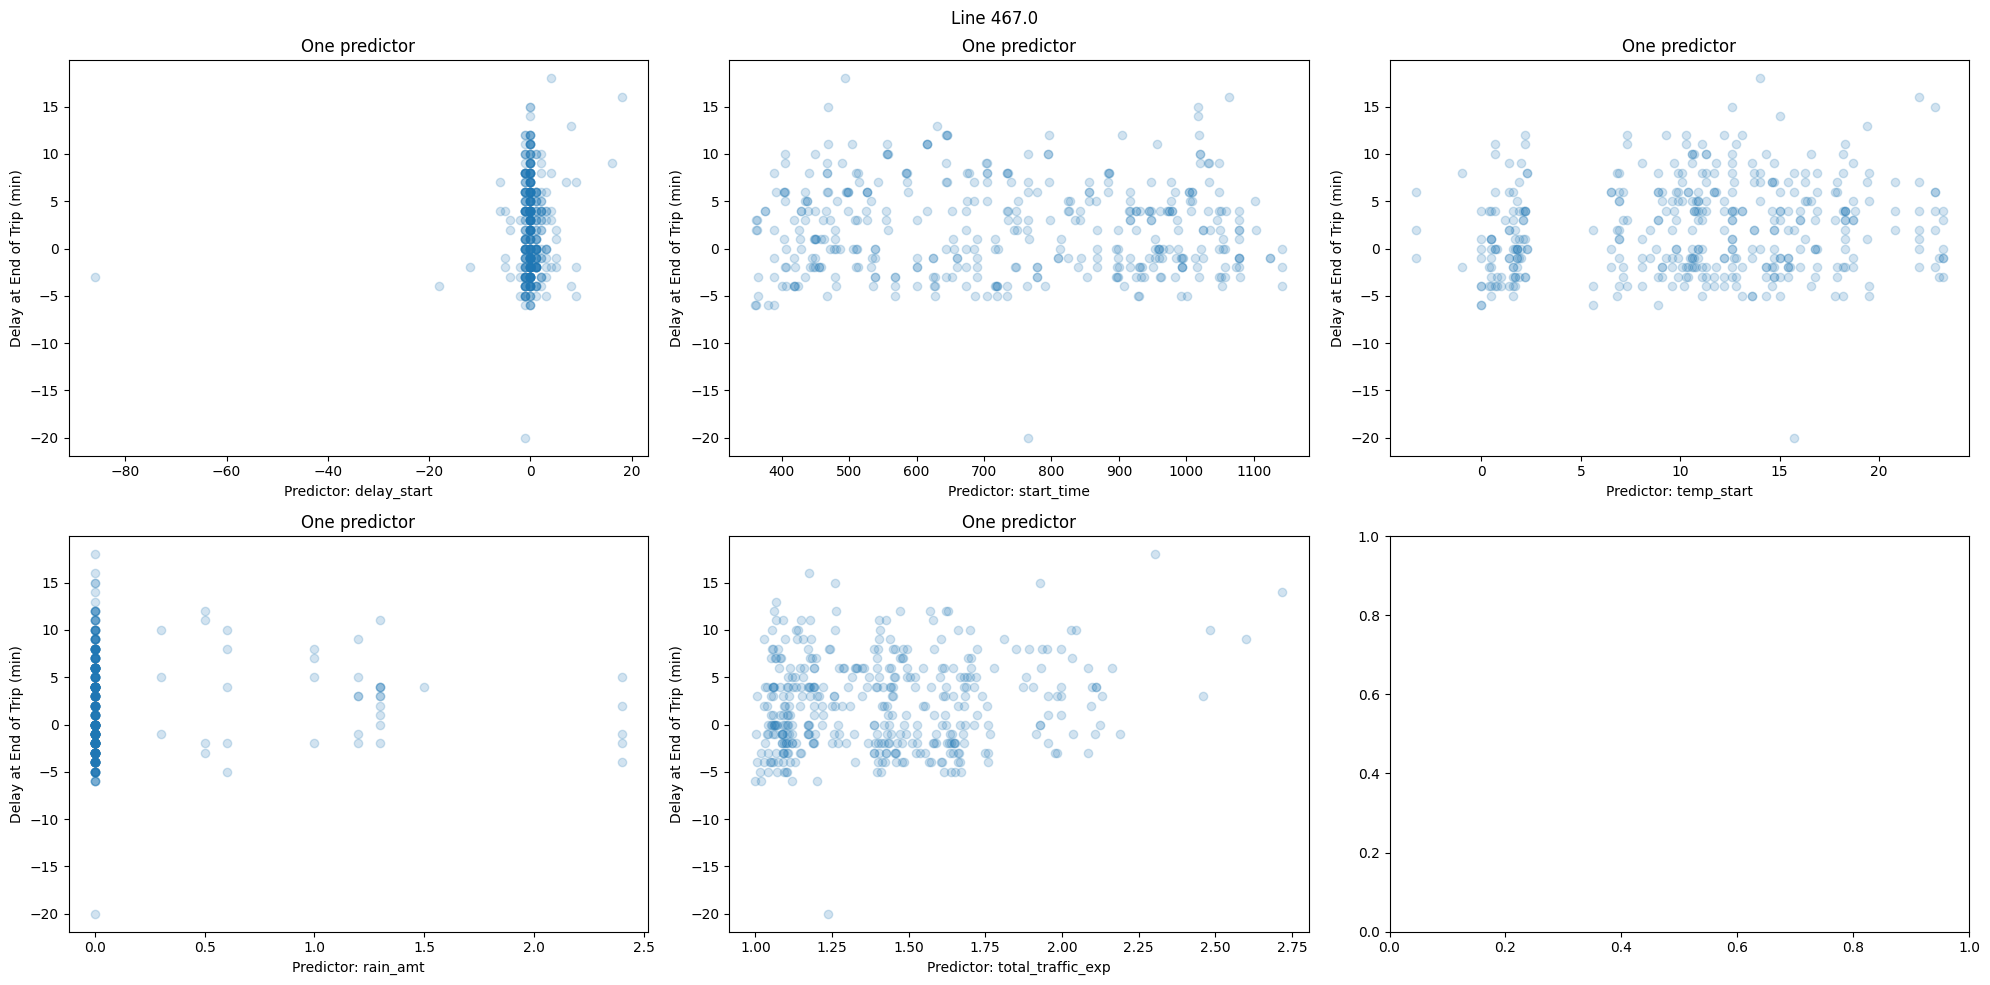

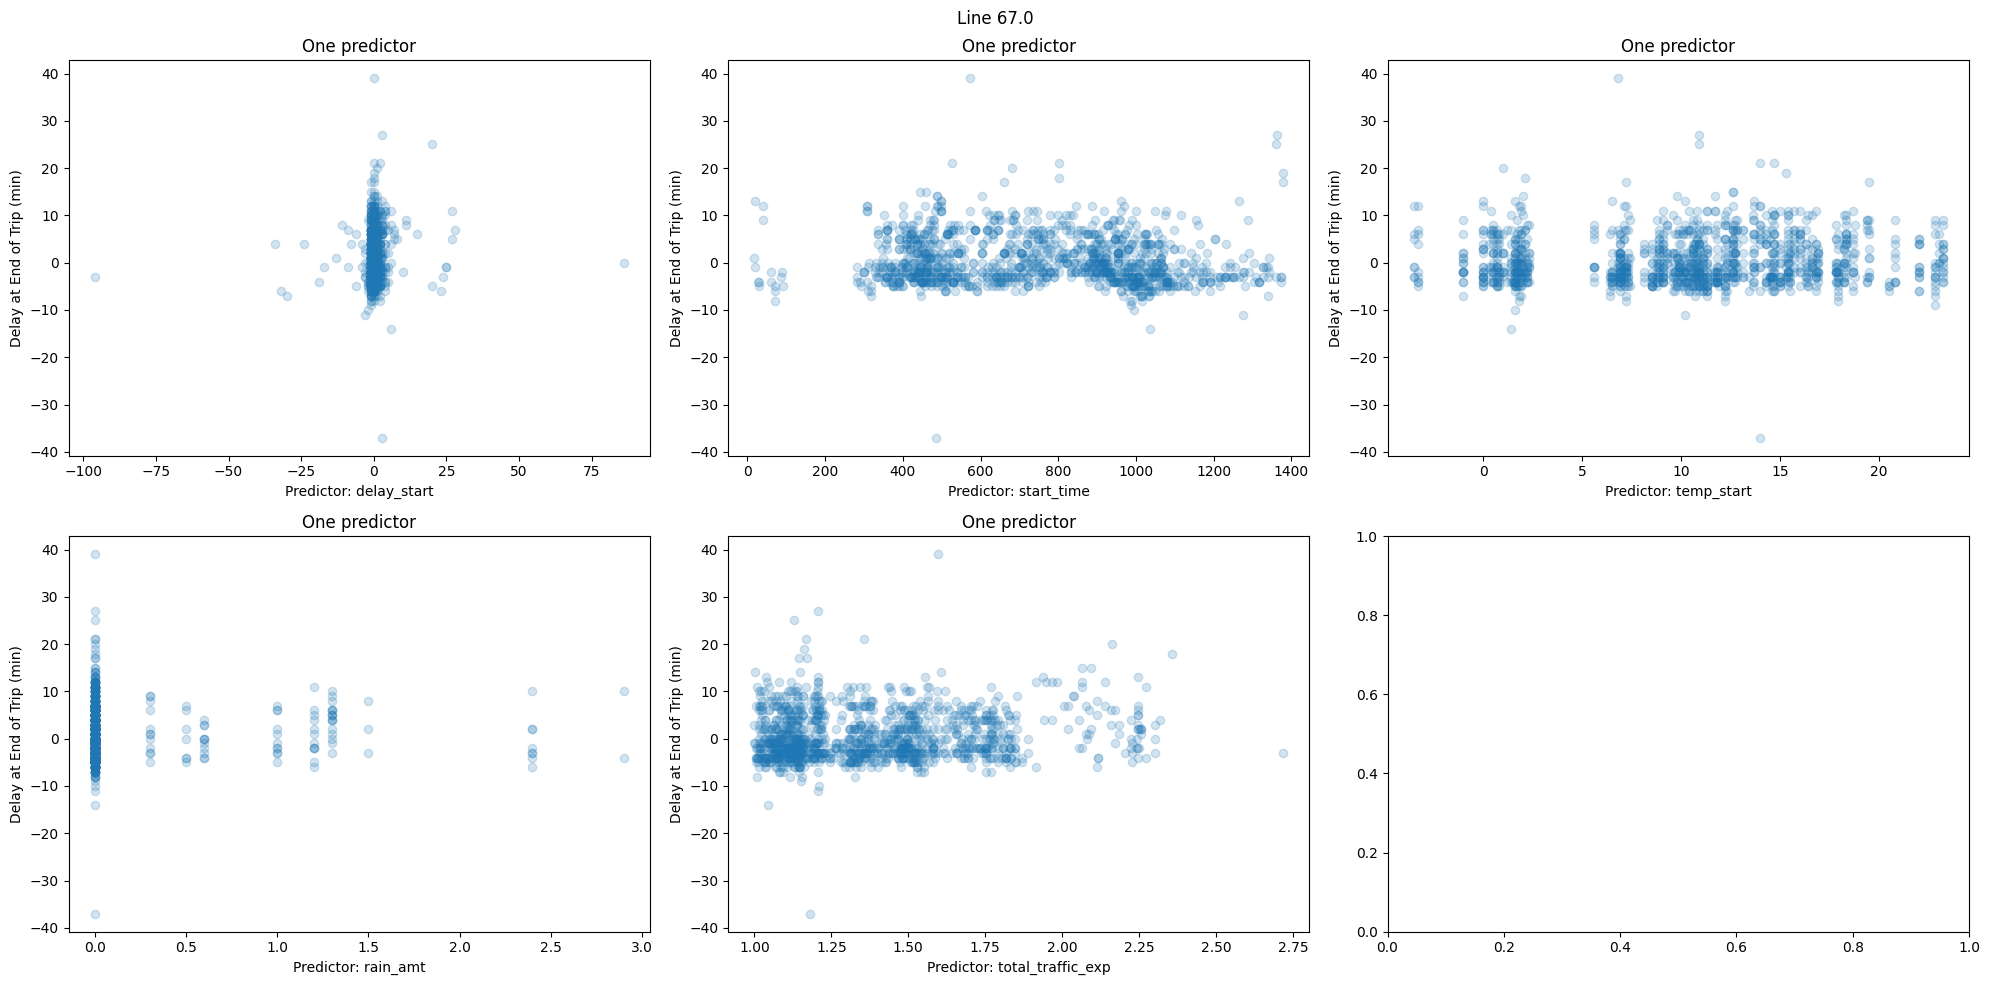

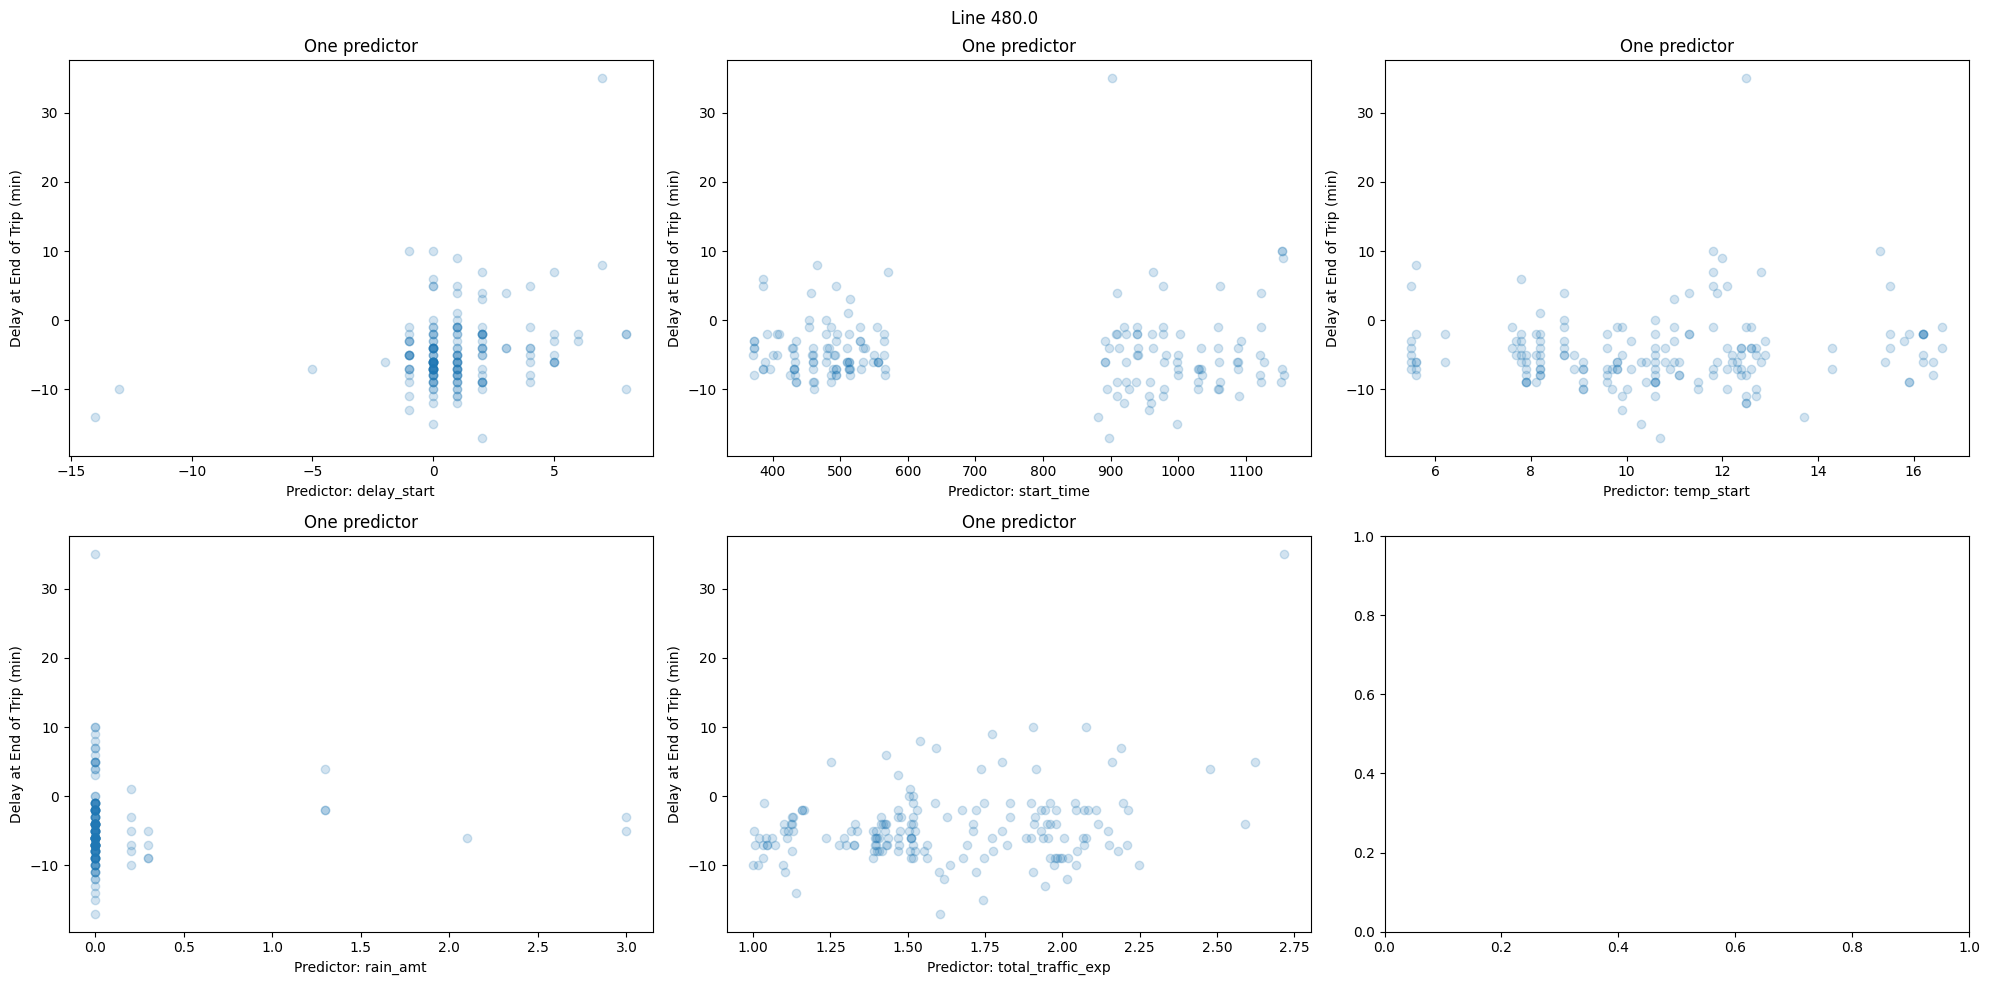

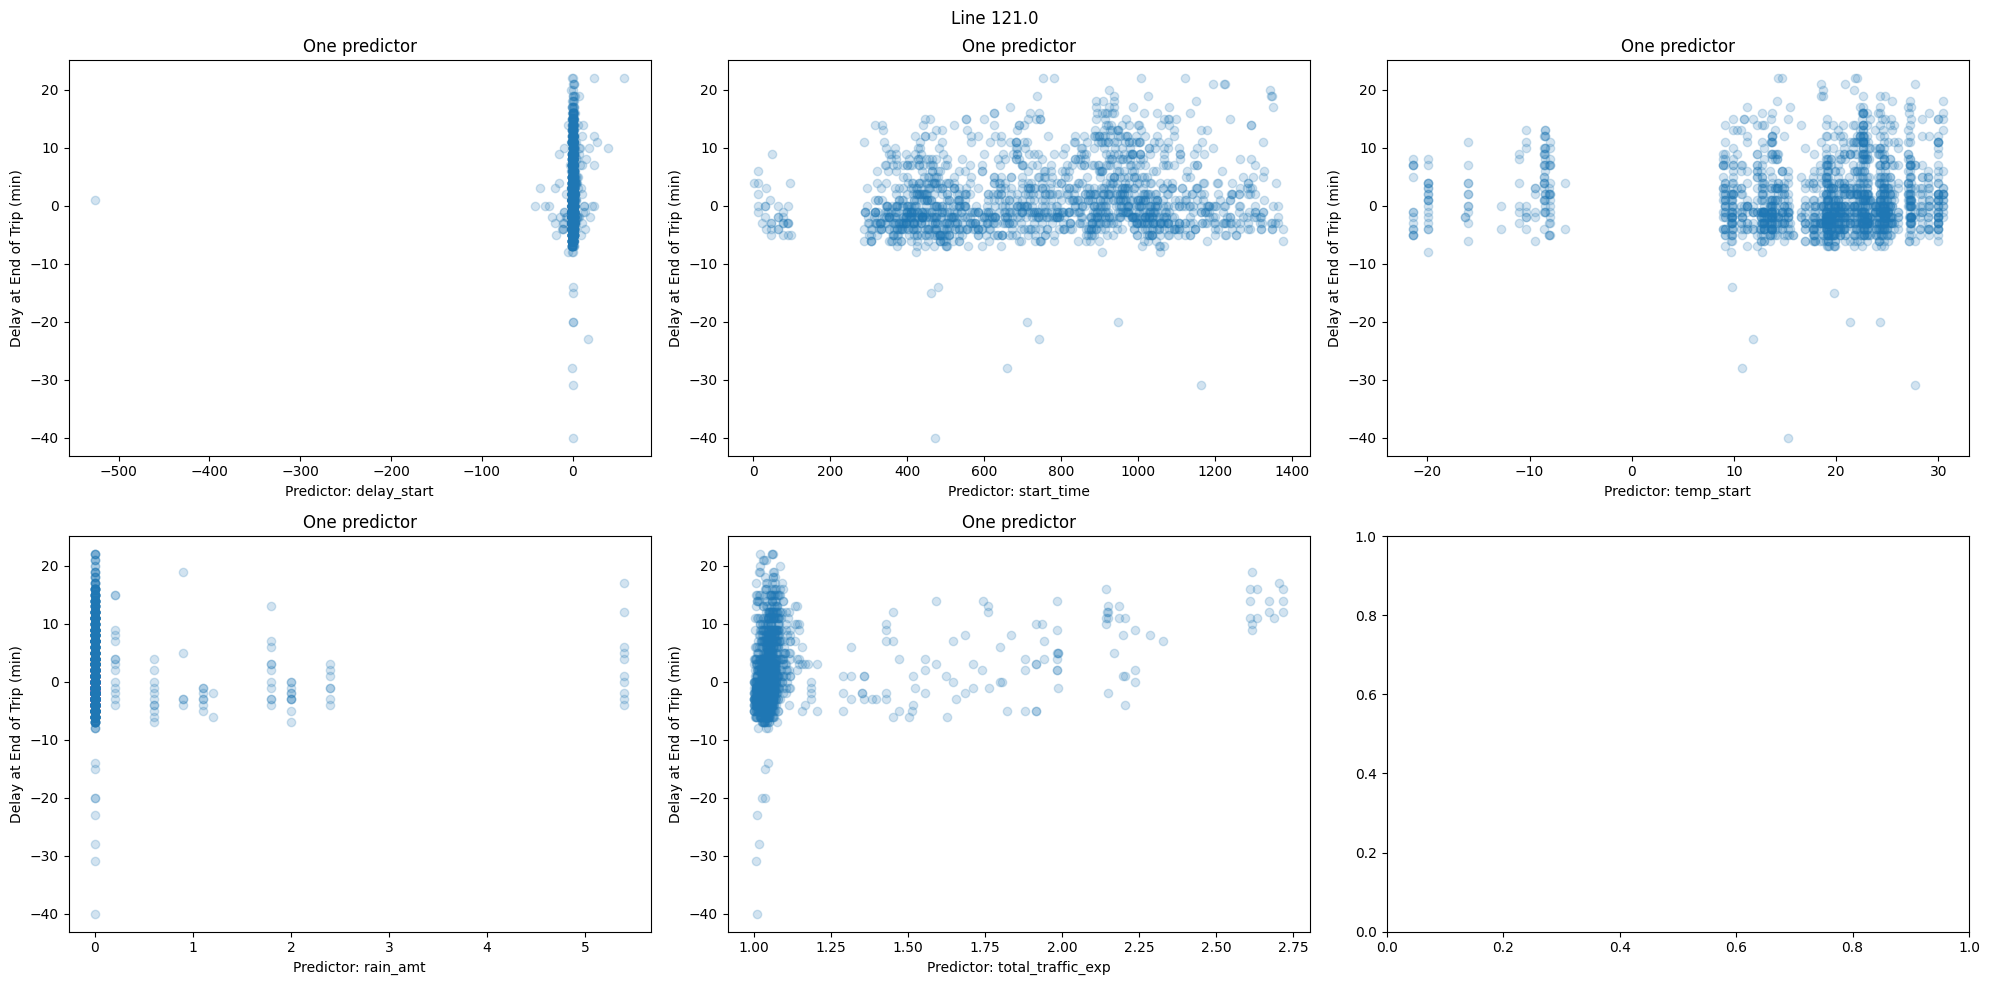

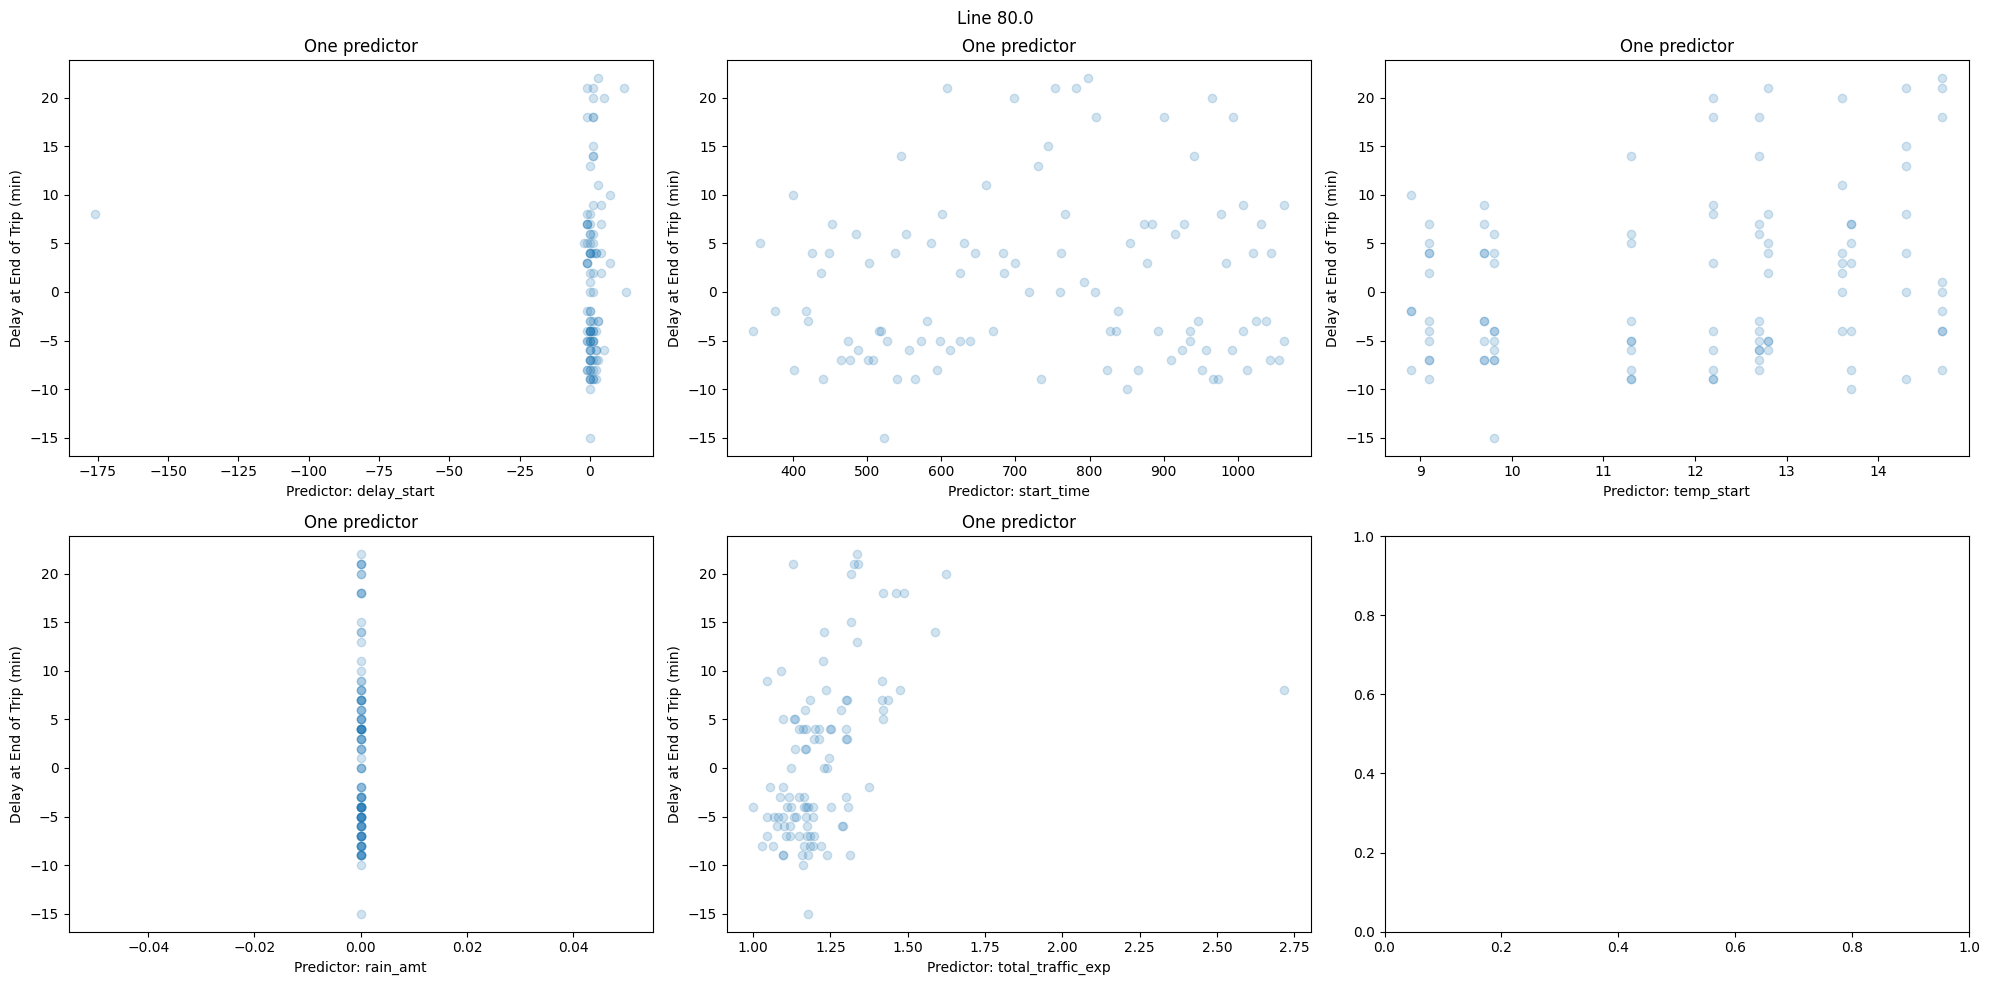

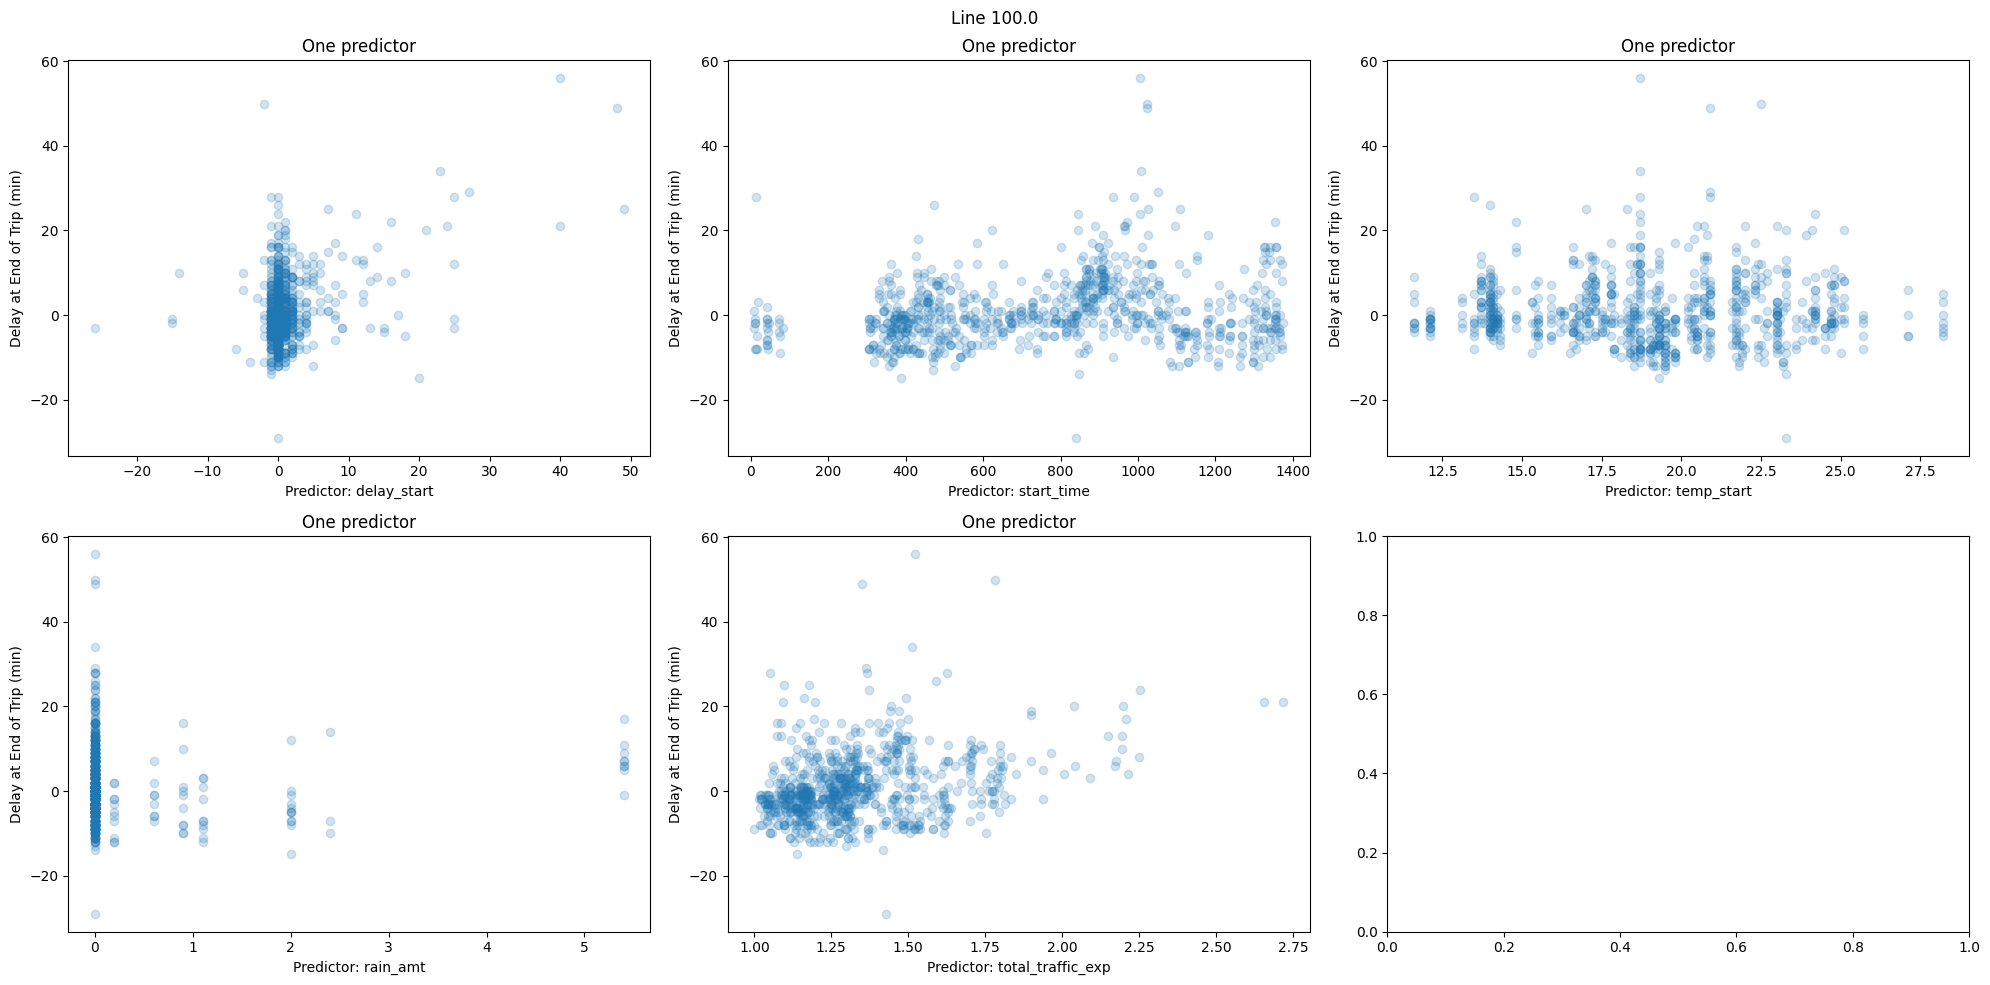

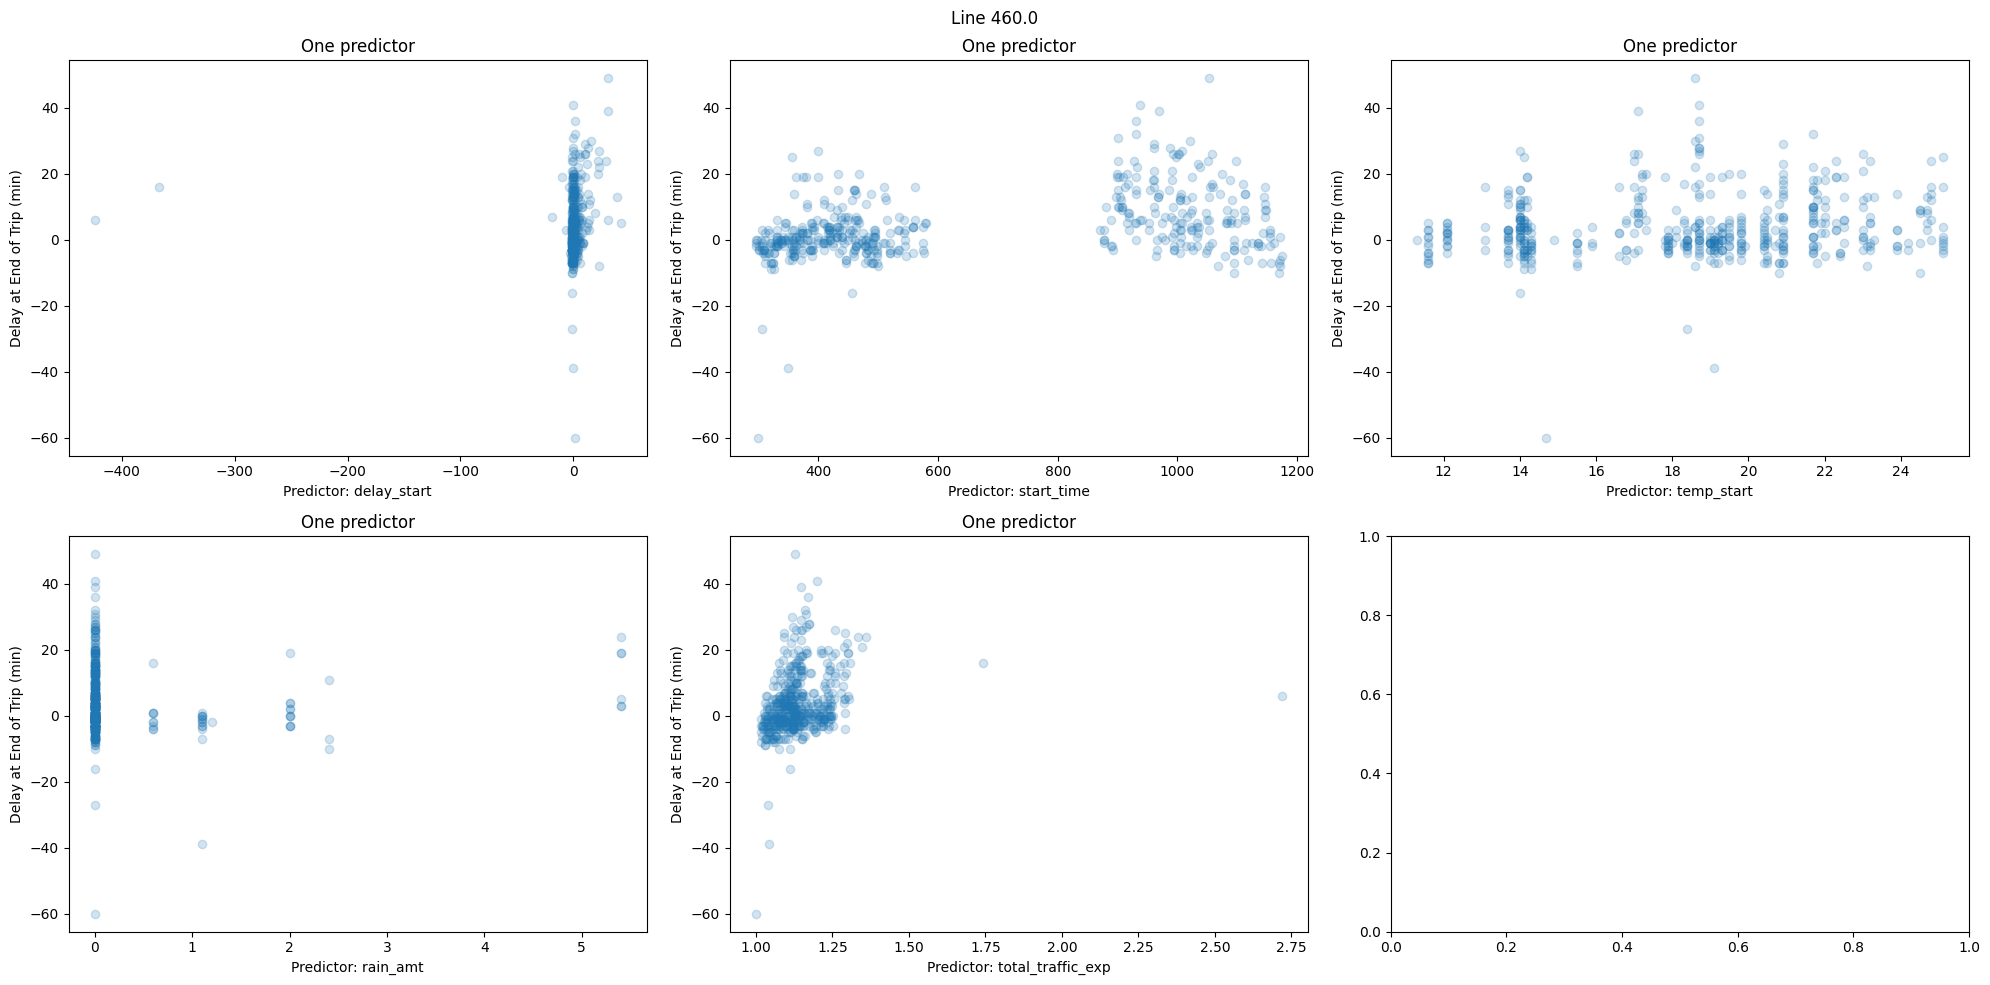

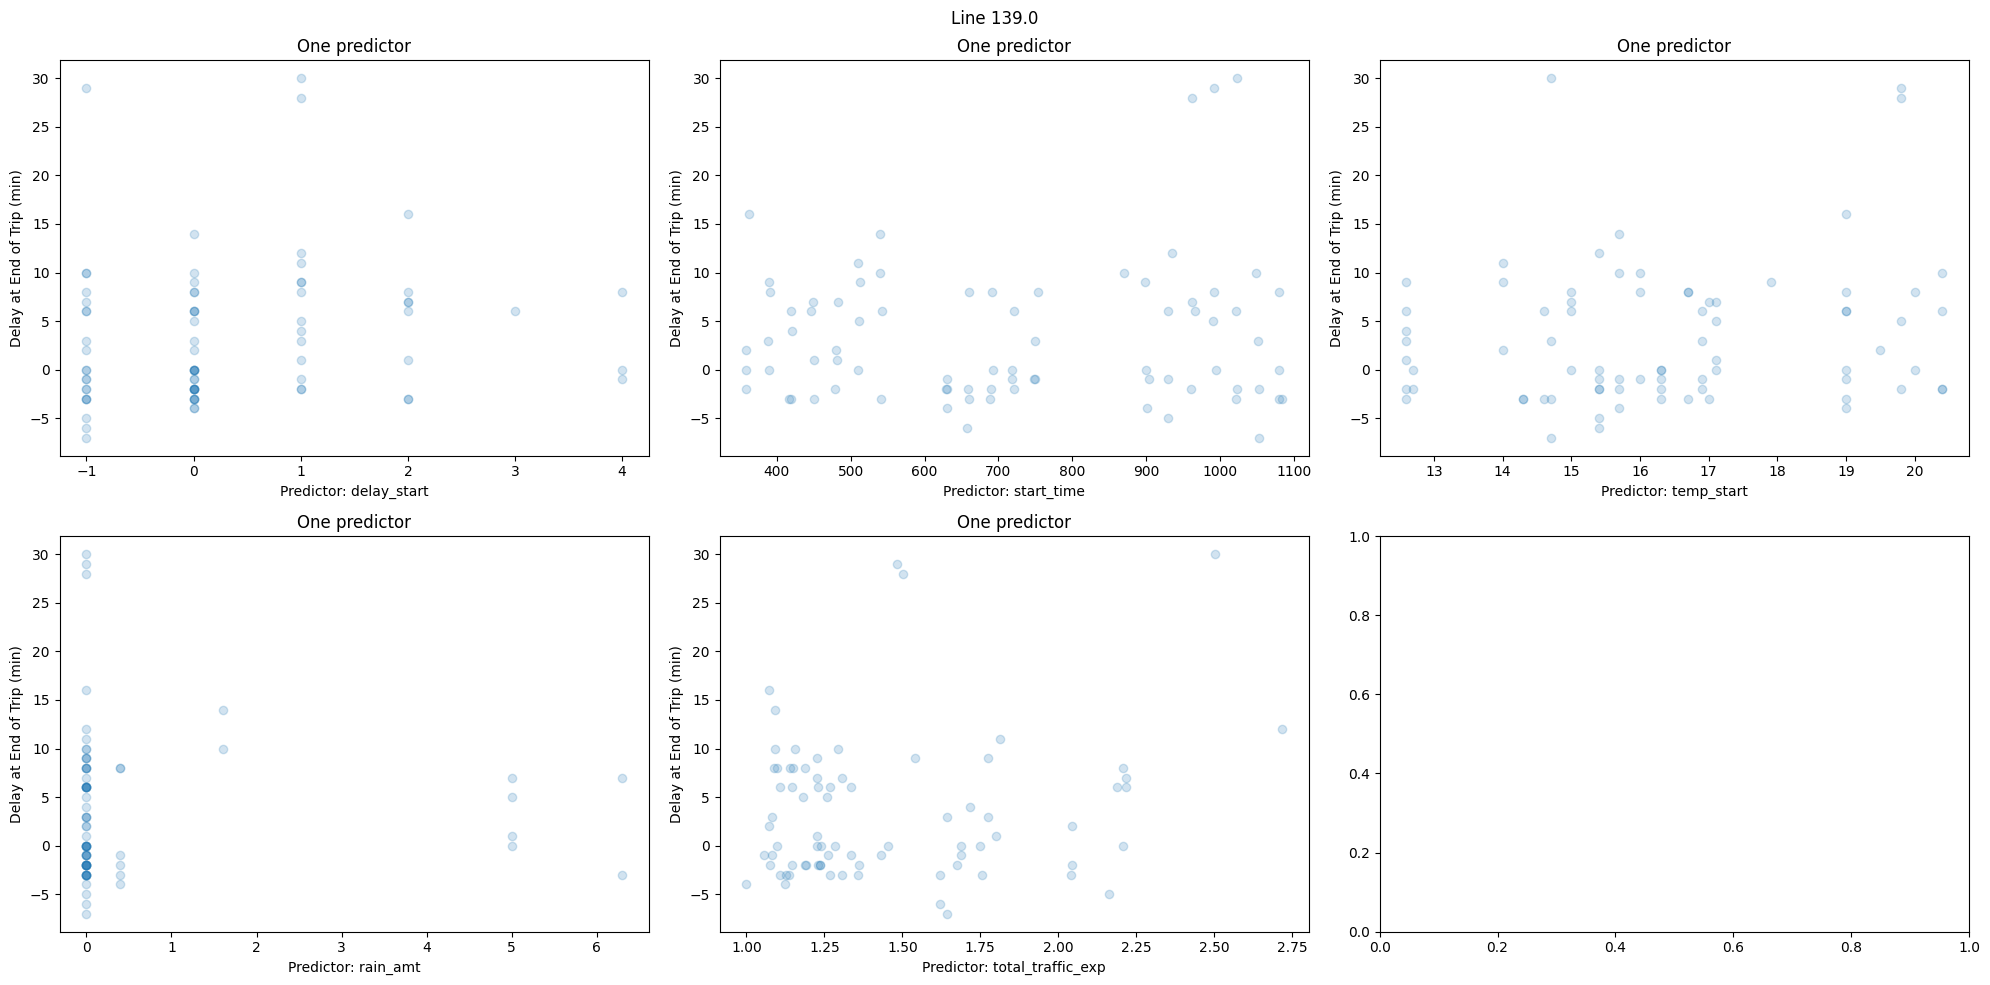

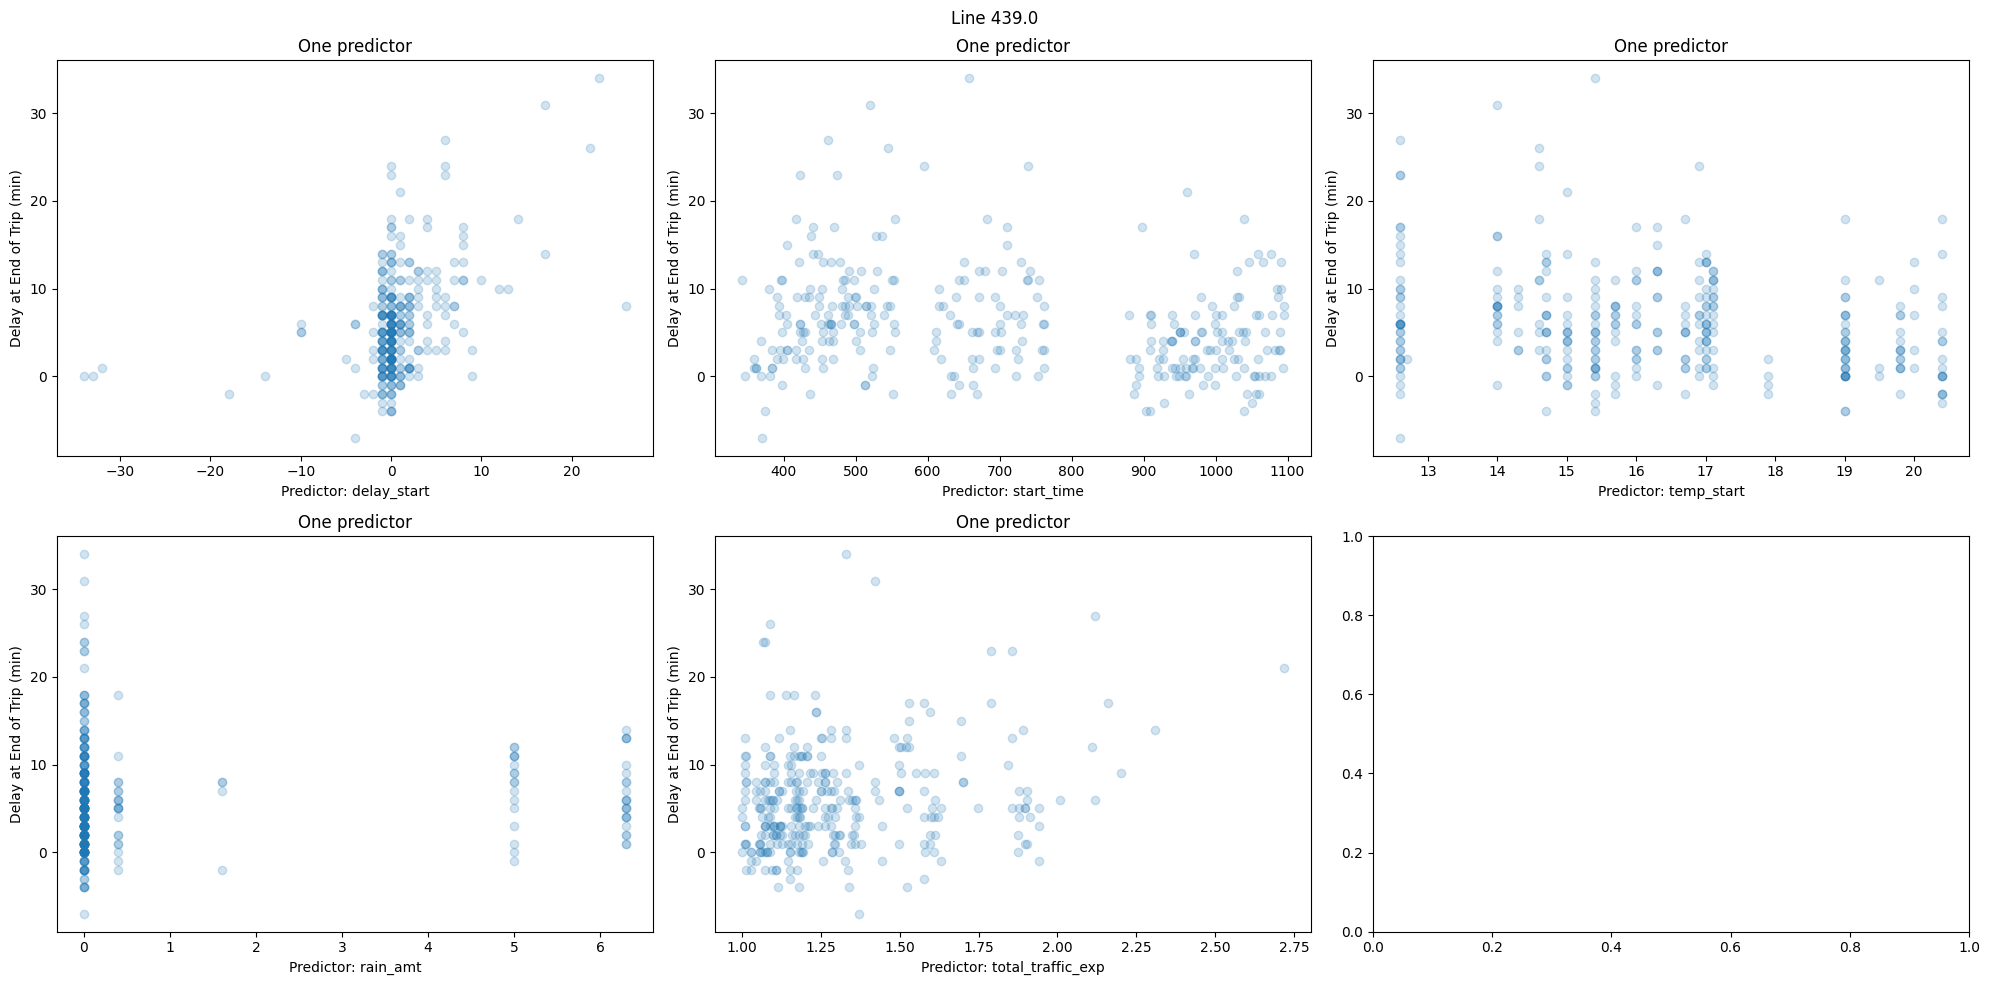

In [ ]:
# Plot the outcome against the predictors for each line
# Store the plots as png files

for key in df_line_t.keys():
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    for i, axi in enumerate(ax.flat):
        if i < len(predictors_lines_exp):
            axi.scatter(df_line_t[key][predictors_lines_exp[i]], df_line_t[key][outcome_lines_exp], color='tab:blue', alpha=0.2)
            axi.set_ylabel('Delay at End of Trip (min)')
            axi.set_xlabel(f'Predictor: {predictors_lines_exp[i]}')
            axi.set_title("One predictor")
    plt.suptitle(f'Line {key}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Find the number of datapoints in each line
keys = list(df_line_t.keys())
for key in keys:
    print(key, len(df_line_t[key]))

# Remove lines with less than 500 datapoints
keys = list(df_line_t.keys())
for key in keys:
    if len(df_line_t[key]) < 500:
        df_line_t.pop(key, None)


467.0 395
67.0 1218
480.0 171
121.0 1592
80.0 103
100.0 789
460.0 481
139.0 77
439.0 308


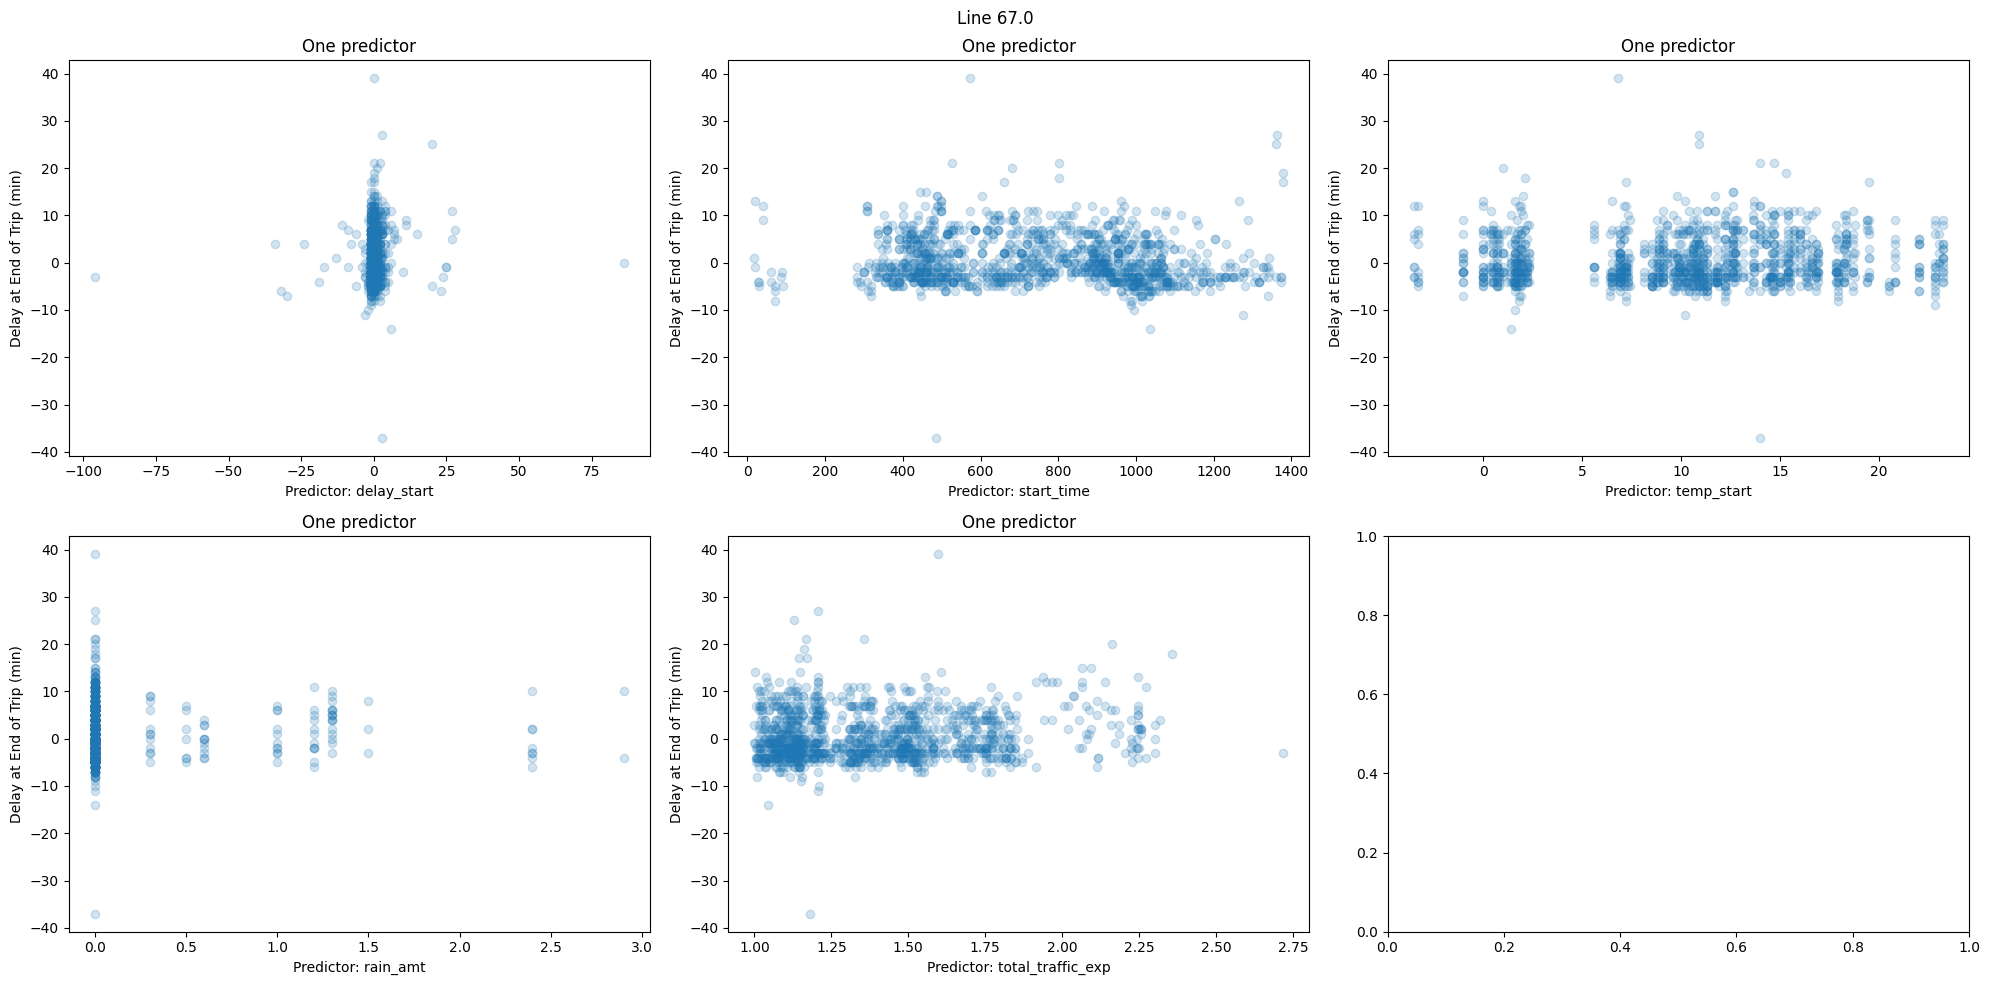

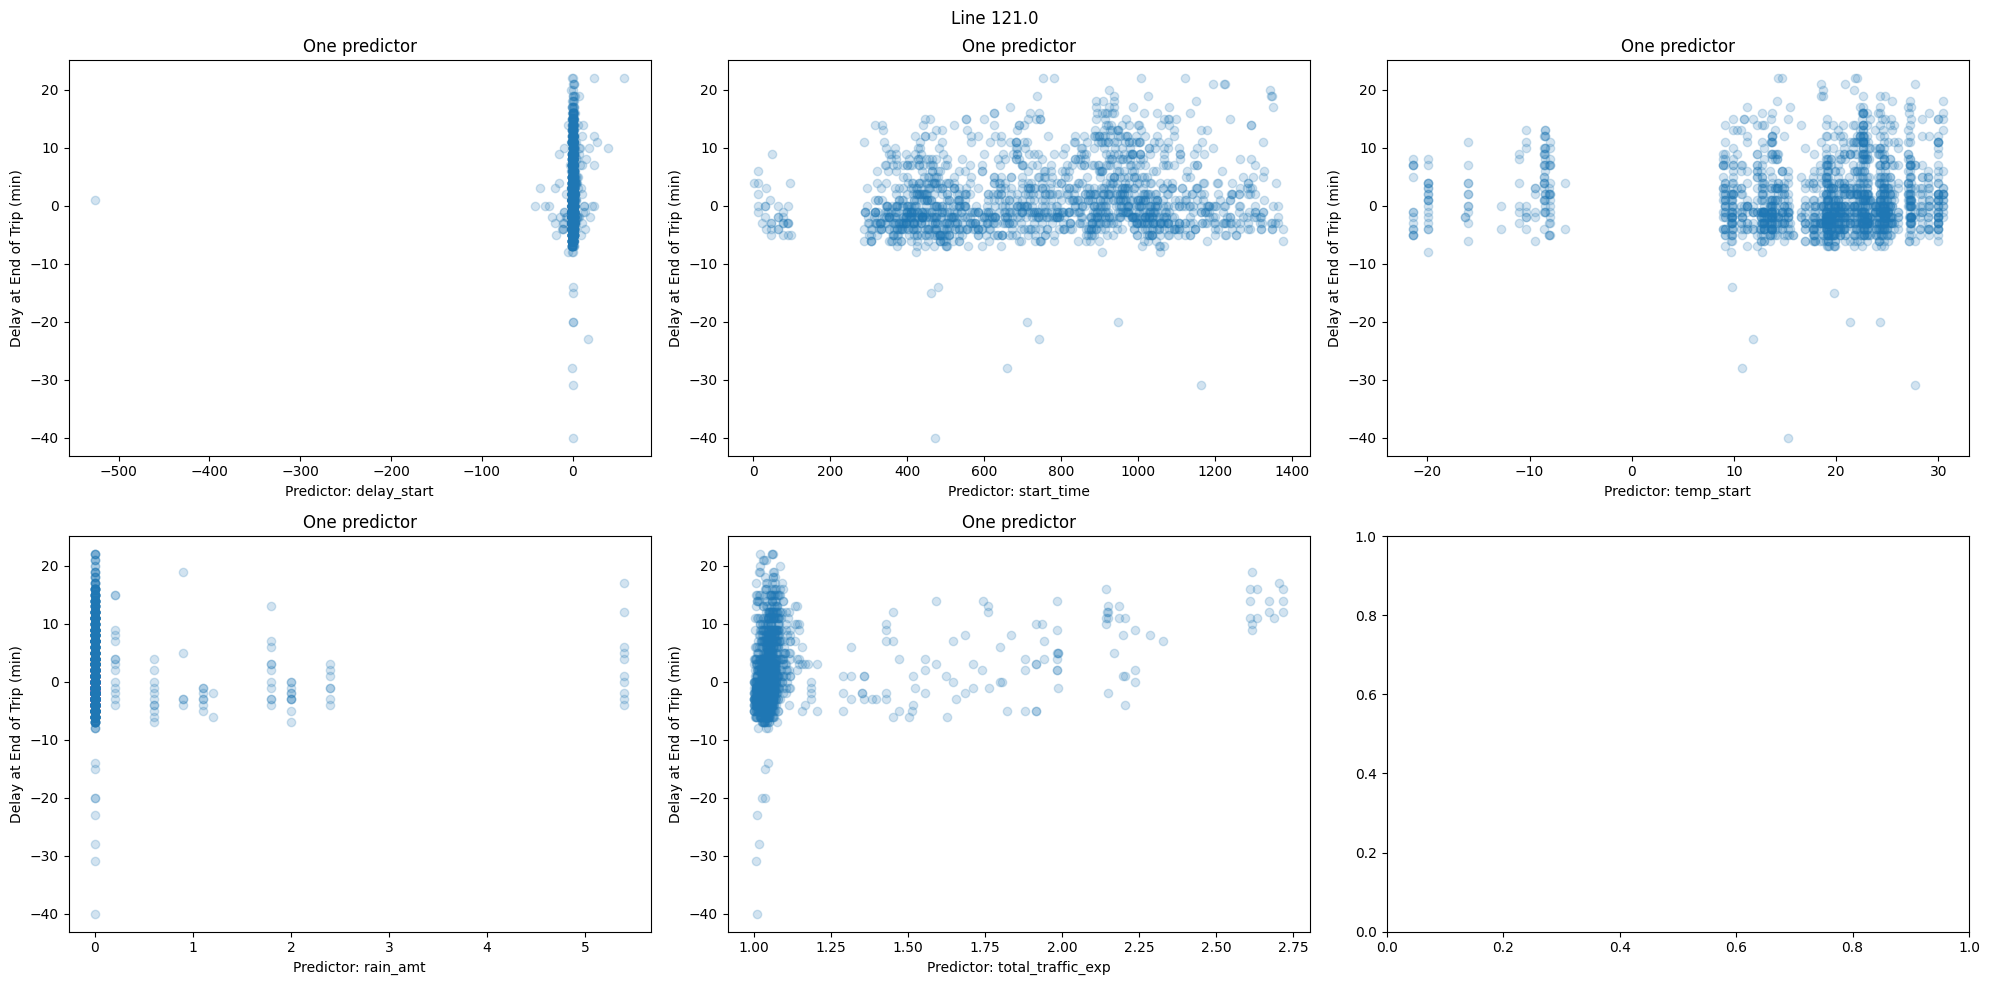

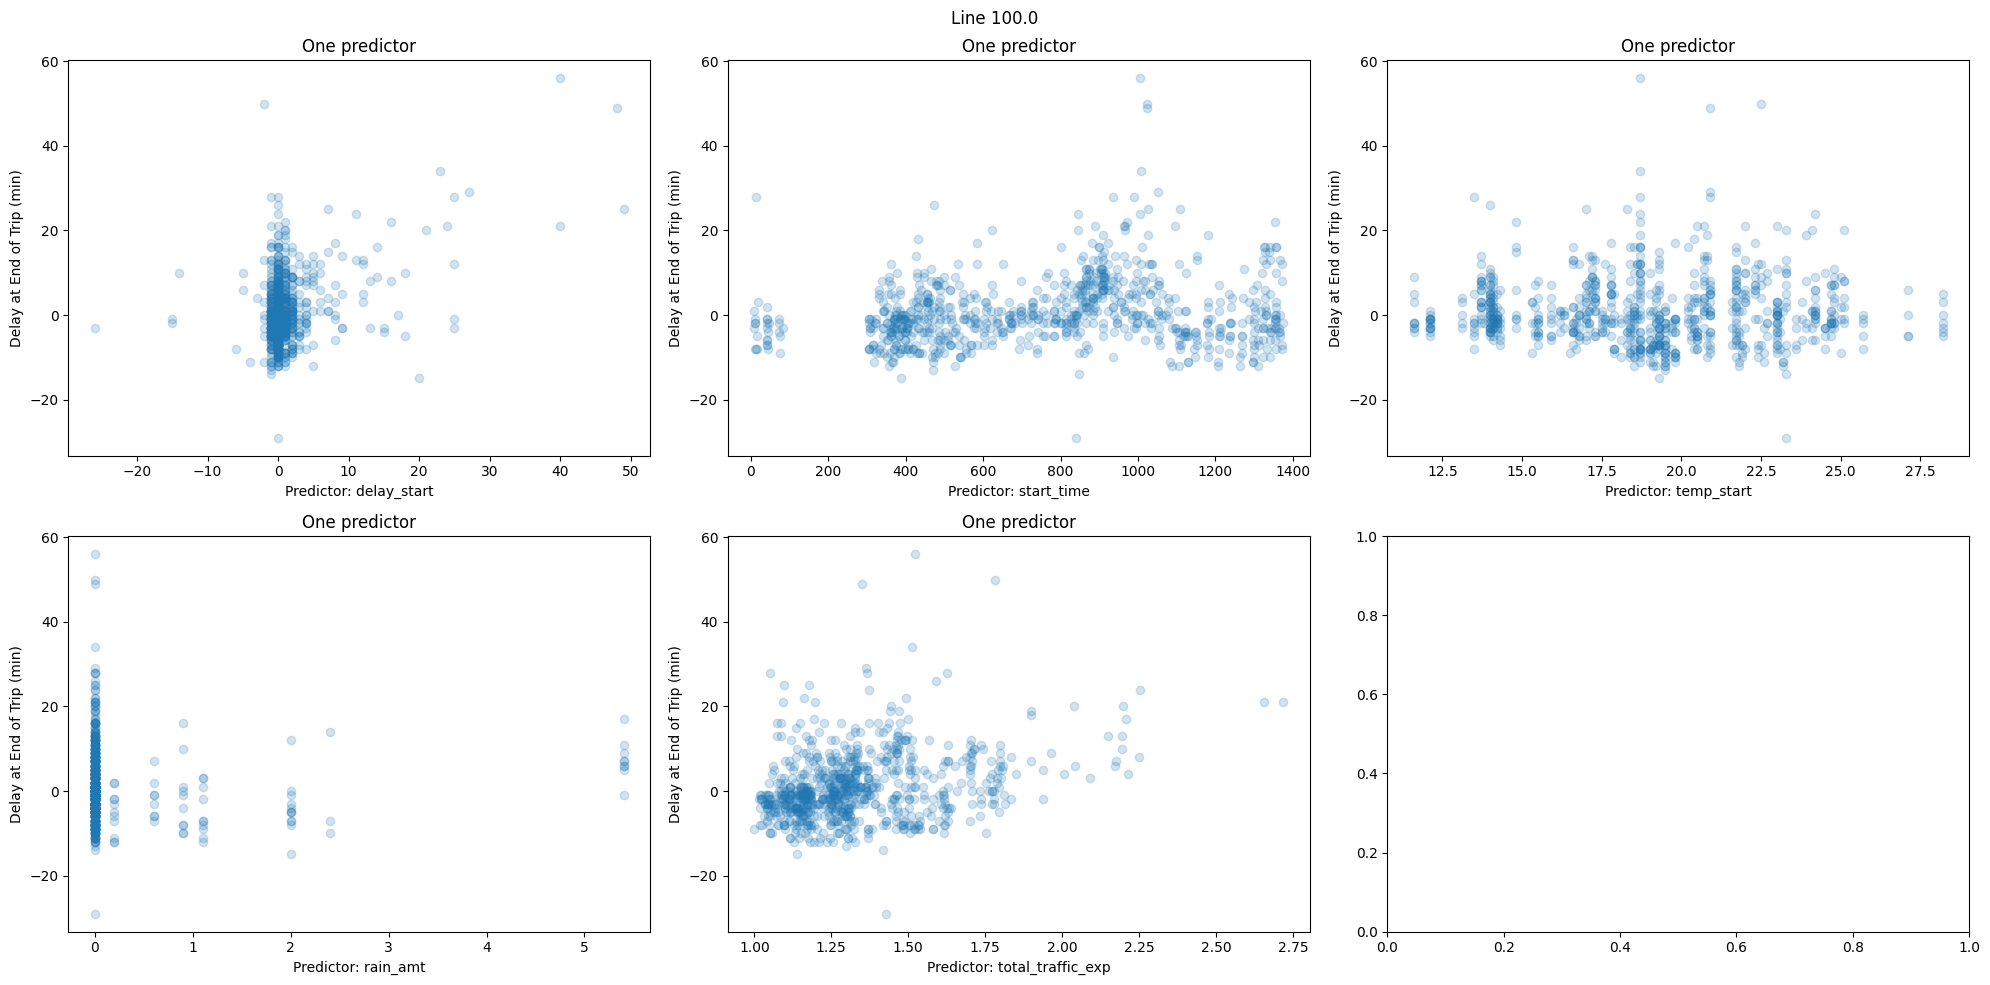

In [ ]:
# Plot the outcome against the predictors for each line
# Store the plots as png files

for key in df_line_t.keys():
    fig, ax = plt.subplots(2, 3, figsize=(20, 10))
    for i, axi in enumerate(ax.flat):
        if i < len(predictors_lines_exp):
            axi.scatter(df_line_t[key][predictors_lines_exp[i]], df_line_t[key][outcome_lines_exp], color='tab:blue', alpha=0.2)
            axi.set_ylabel('Delay at End of Trip (min)')
            axi.set_xlabel(f'Predictor: {predictors_lines_exp[i]}')
            axi.set_title("One predictor")
    plt.suptitle(f'Line {key}')
    plt.tight_layout()
    plt.savefig(f'../Data/Plots/traffic_exp/Line {key} exp.png')
    plt.show()

<div style="display: flex; justify-content: space-between;">
<a style="flex: 1; text-align: left;" href="./3_2_1_MLR_bus_weather.ipynb">← Previous: 3.2.1 MLR with Weather</a>
<span style="flex: 1; text-align: center;">3.2.2 MLR with Traffic</span>
<a style="flex: 1; text-align: right;" href="./4_Conclusions.ipynb">Next: 4. Conclusions →</a>
</div>
